<a href="https://colab.research.google.com/github/utharadas/allergy-prediction-model/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Data and Preparation


In [ ]:
import pandas as pd

# allergies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/healthcareManagementSystem/allergies.csv')
# conditions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/healthcareManagementSystem/conditions.csv')
# immunizations = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/healthcareManagementSystem/immunizations.csv')
# patients = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/healthcareManagementSystem/patients.csv')
# medications = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/healthcareManagementSystem/medications.csv')

allergies = pd.read_csv('allergies.csv')
conditions = pd.read_csv('conditions.csv')
immunizations = pd.read_csv('immunizations.csv')
patients = pd.read_csv('patients.csv')
medications = pd.read_csv('medications.csv')

# removing duplicates
new_medications = medications.drop_duplicates(subset=['PATIENT'], keep='first')
new_allergies = allergies.drop_duplicates(subset=['PATIENT'], keep='first')
new_conditions = conditions.drop_duplicates(subset=['PATIENT'], keep='first')

new_medications.to_csv('new_medications.csv', index=False)
new_allergies.to_csv('new_allergies.csv', index=False)
new_conditions.to_csv('new_conditions.csv', index=False)

# fixing column names
new_conditions = new_conditions.rename(columns={'DESCRIPTION': 'condition'})
new_medications = new_medications.rename(columns={'DESCRIPTION': 'medication'})
new_allergies = new_allergies.rename(columns={'DESCRIPTION': 'allergy'})
new_medications = new_medications.rename(columns={'REASONDESCRIPTION': 'medication_reason'})


# merge
data = patients.merge(new_conditions[['PATIENT', 'condition']], left_on='Id', right_on='PATIENT', how='inner')
data = data.merge(new_medications[['PATIENT', 'medication']], on='PATIENT', how='inner')
data = data.merge(new_allergies[['PATIENT', 'allergy']], on='PATIENT', how='inner')

final_data = data[['Id', 'condition', 'medication', 'allergy','GENDER','RACE']]
final_data.head()

data = patients.merge(new_medications[['PATIENT', 'medication', 'medication_reason']], left_on='Id', right_on='PATIENT', how='inner')
data = data.merge(new_allergies[['PATIENT', 'allergy']], on='PATIENT', how='inner')

medAllergy_df = data[['Id', 'medication','medication_reason', 'allergy']]



# Data Visualization

## Bar Graph

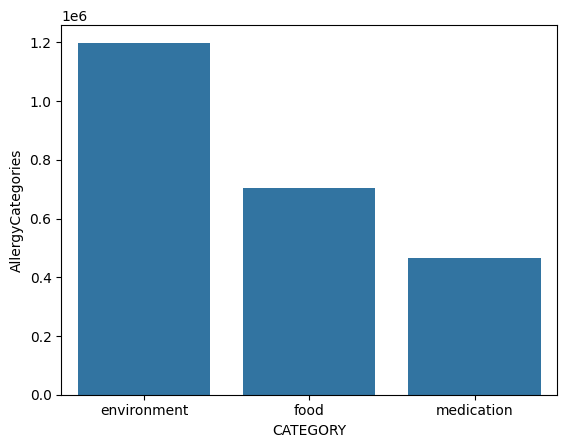

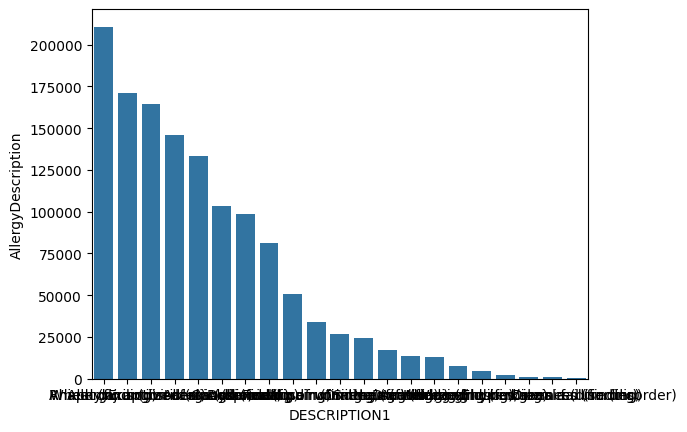

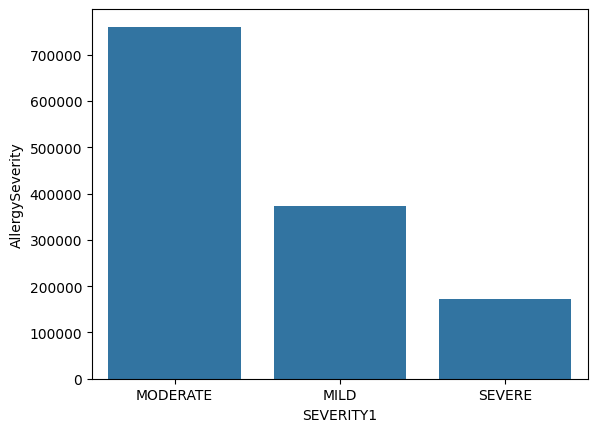

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

allergiesDF = pd.read_csv('allergies.csv')
conditionsDF = pd.read_csv('conditions.csv')
immunizationsDF = pd.read_csv('immunizations.csv')

mergedDF = pd.merge(allergiesDF, conditionsDF, on='PATIENT', how='left')
mergedDF = pd.merge(mergedDF, immunizationsDF, on='PATIENT', how='left')

mergedDF = mergedDF.drop(columns=['STOP_x', 'STOP_y'])

allergy_category = mergedDF['CATEGORY'].value_counts().rename("AllergyCategories")
allergy_types = mergedDF['TYPE'].value_counts().rename("AllergyTypes")

allergy_descriptions = mergedDF['DESCRIPTION1'].value_counts().rename("AllergyDescription")
allergy_severity = mergedDF['SEVERITY1'].value_counts().rename("AllergySeverity")

condition_code = mergedDF['CODE_y'].value_counts().rename("ConditionSNOMEDCodes")
condition_description = mergedDF['DESCRIPTION_y'].rename("ConditionDescriptions")

immunization_code = mergedDF['CODE'].rename("ImmunizationCodes")
immunization_description = mergedDF['DESCRIPTION'].rename("ImmunizationDescriptions")

sns.barplot(data=allergy_category)
plt.show()

sns.barplot(data=allergy_descriptions)
plt.show()

sns.barplot(data=allergy_severity)
plt.show()




## Heat Map of Condition vs Allergy

                                     Id                            condition  \
0  0a859c31-a1e5-03ee-7e60-c3661644185f         Chronic sinusitis (disorder)   
1  c719203f-0cb7-42e7-9cb2-c2ec32b99353         Chronic sinusitis (disorder)   
2  8860d8e2-6471-7e22-4b85-c4bd4e6599a8  Risk activity involvement (finding)   
3  ebfa5f8b-6aa8-6f80-1cad-1221a00b6933                         Hypertension   
4  b2049305-5896-e051-b8c3-16bcdca19289     Housing unsatisfactory (finding)   

                                          medication  \
0                 Naproxen sodium 220 MG Oral Tablet   
1     Chlorpheniramine Maleate 2 MG/ML Oral Solution   
2                       lisinopril 10 MG Oral Tablet   
3                       lisinopril 10 MG Oral Tablet   
4  60 ACTUAT Fluticasone propionate 0.25 MG/ACTUA...   

                      allergy  
0             Mold (organism)  
1             Mold (organism)  
2    Grass pollen (substance)  
3   Animal dander (substance)  
4  House dust mite (or

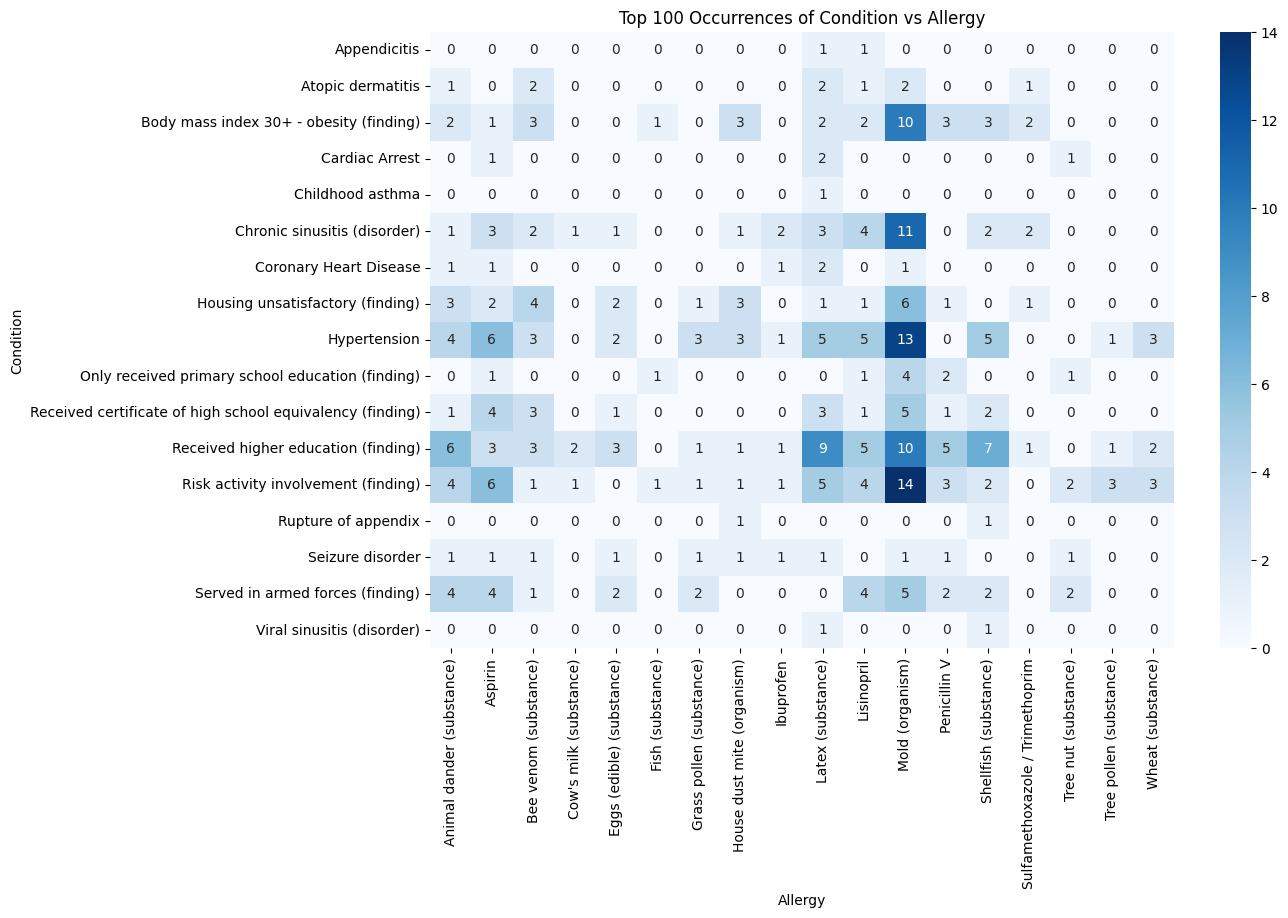

In [ ]:
import pandas as pd

patients = pd.read_csv('patients.csv')
medications = pd.read_csv('medications.csv')
allergies = pd.read_csv('allergies.csv')
conditions = pd.read_csv('conditions.csv')

# removing duplicates
new_medications = medications.drop_duplicates(subset=['PATIENT'], keep='first')
new_allergies = allergies.drop_duplicates(subset=['PATIENT'], keep='first')
new_conditions = conditions.drop_duplicates(subset=['PATIENT'], keep='first')

new_medications.to_csv('new_medications.csv', index=False)
new_allergies.to_csv('new_allergies.csv', index=False)
new_conditions.to_csv('new_conditions.csv', index=False)

# fixing column names
new_conditions = new_conditions.rename(columns={'DESCRIPTION': 'condition'})
new_medications = new_medications.rename(columns={'DESCRIPTION': 'medication'})
new_allergies = new_allergies.rename(columns={'DESCRIPTION': 'allergy'})

# merge
data = patients.merge(new_conditions[['PATIENT', 'condition']], left_on='Id', right_on='PATIENT', how='inner')
data = data.merge(new_medications[['PATIENT', 'medication']], on='PATIENT', how='inner')
data = data.merge(new_allergies[['PATIENT', 'allergy']], on='PATIENT', how='inner')

final_data = data[['Id', 'condition', 'medication', 'allergy']]

print(final_data.head())

# heat map of occurences
import seaborn as sns
import matplotlib.pyplot as plt

cross_tab = pd.crosstab(index=data['condition'], columns=data['allergy'])

top_100 = cross_tab.unstack().sort_values(ascending=False)[:100]

top_100_conditions = top_100.index.get_level_values('condition').tolist()
top_100_allergies = top_100.index.get_level_values('allergy').tolist()

filtered_data = data[(data['condition'].isin(top_100_conditions)) & (data['allergy'].isin(top_100_allergies))]

filtered_cross_tab = pd.crosstab(index=filtered_data['condition'], columns=filtered_data['allergy'])

plt.figure(figsize=(12, 8))
sns.heatmap(filtered_cross_tab, annot=True, cmap='Blues', fmt='g')
plt.title('Top 100 Occurrences of Condition vs Allergy')
plt.xlabel('Allergy')
plt.ylabel('Condition')
plt.show()


## Testing + Heat Map of Allergies vs Meds

Contingency Table:
allergy                                             Animal dander (substance)  \
medication                                                                      
1 ML DOCEtaxel 20 MG/ML Injection                                           1   
120 ACTUAT Fluticasone propionate 0.044 MG/ACTU...                          0   
24 HR Metformin hydrochloride 500 MG Extended R...                          0   
24hr nicotine transdermal patch                                             0   
60 ACTUAT Fluticasone propionate 0.25 MG/ACTUAT...                          0   
Acetaminophen 21.7 MG/ML / Dextromethorphan Hyd...                          0   
Acetaminophen 300 MG / Hydrocodone Bitartrate 5...                          0   
Acetaminophen 325 MG / HYDROcodone Bitartrate 7...                          0   
Acetaminophen 325 MG / oxyCODONE Hydrochloride ...                          2   
Acetaminophen 325 MG Oral Tablet                                            2   
Acetamino

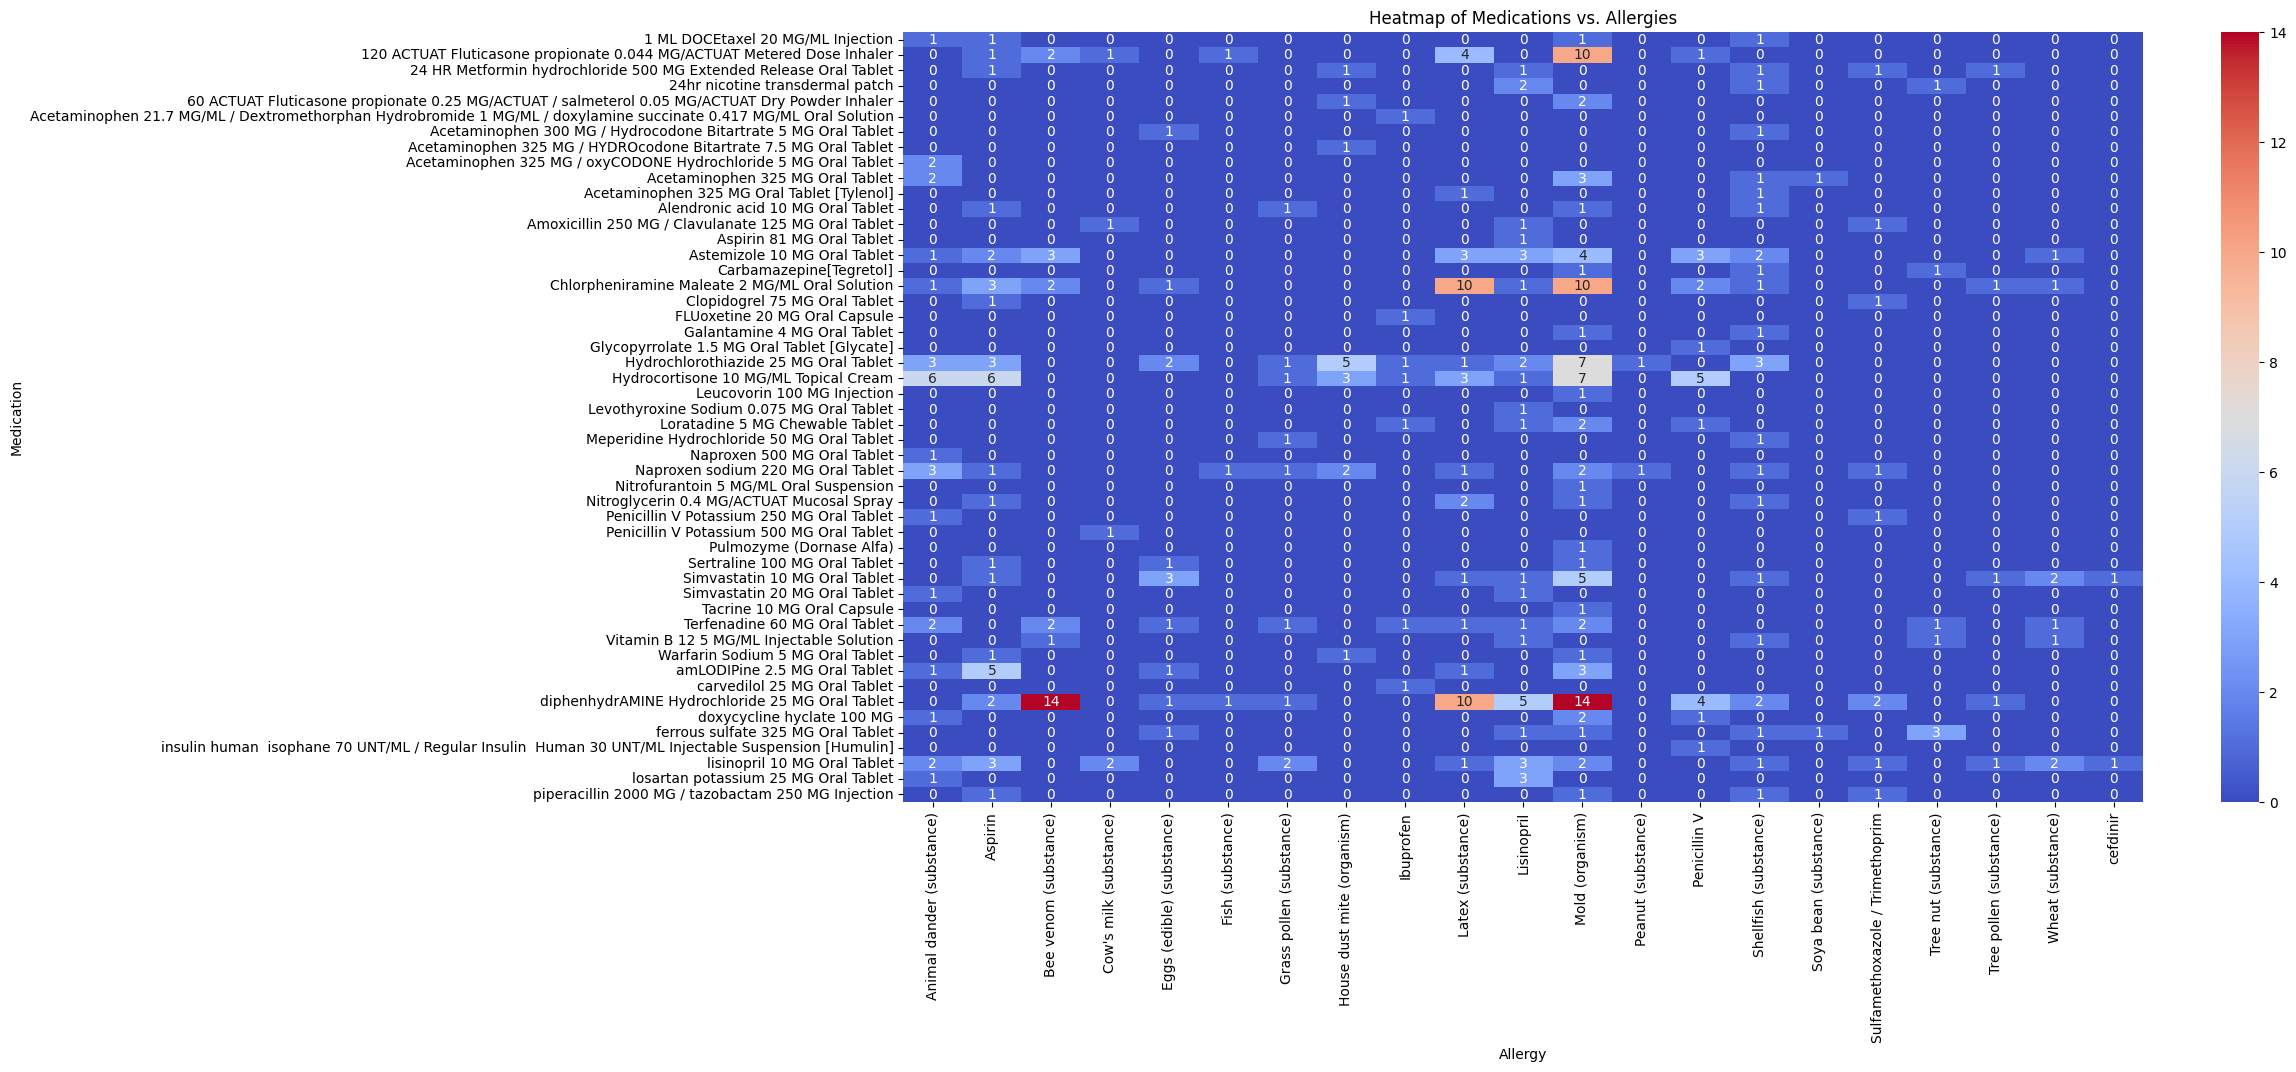

In [ ]:
import pandas as pd
import scipy.stats as stats


contingency_table = pd.crosstab(medAllergy_df['medication'], medAllergy_df['allergy'])

print("Contingency Table:")
print(contingency_table)

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"\nChi-square statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("\nExpected frequencies:")
print(expected)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
sns.heatmap(contingency_table, annot=True, fmt='g', cmap='coolwarm')
plt.title('Heatmap of Medications vs. Allergies')
plt.xlabel('Allergy')
plt.ylabel('Medication')
plt.show()


Contingency Table:
allergy                                             Animal dander (substance)  \
condition                                                                       
Acute bacterial sinusitis (disorder)                                        0   
Acute viral pharyngitis (disorder)                                          1   
Appendicitis                                                                0   
Atopic dermatitis                                                           1   
Body mass index 30+ - obesity (finding)                                     2   
Brain damage - traumatic                                                    0   
Cardiac Arrest                                                              0   
Cerebral palsy (disorder)                                                   0   
Childhood asthma                                                            0   
Chronic sinusitis (disorder)                                                1   
Coronary 

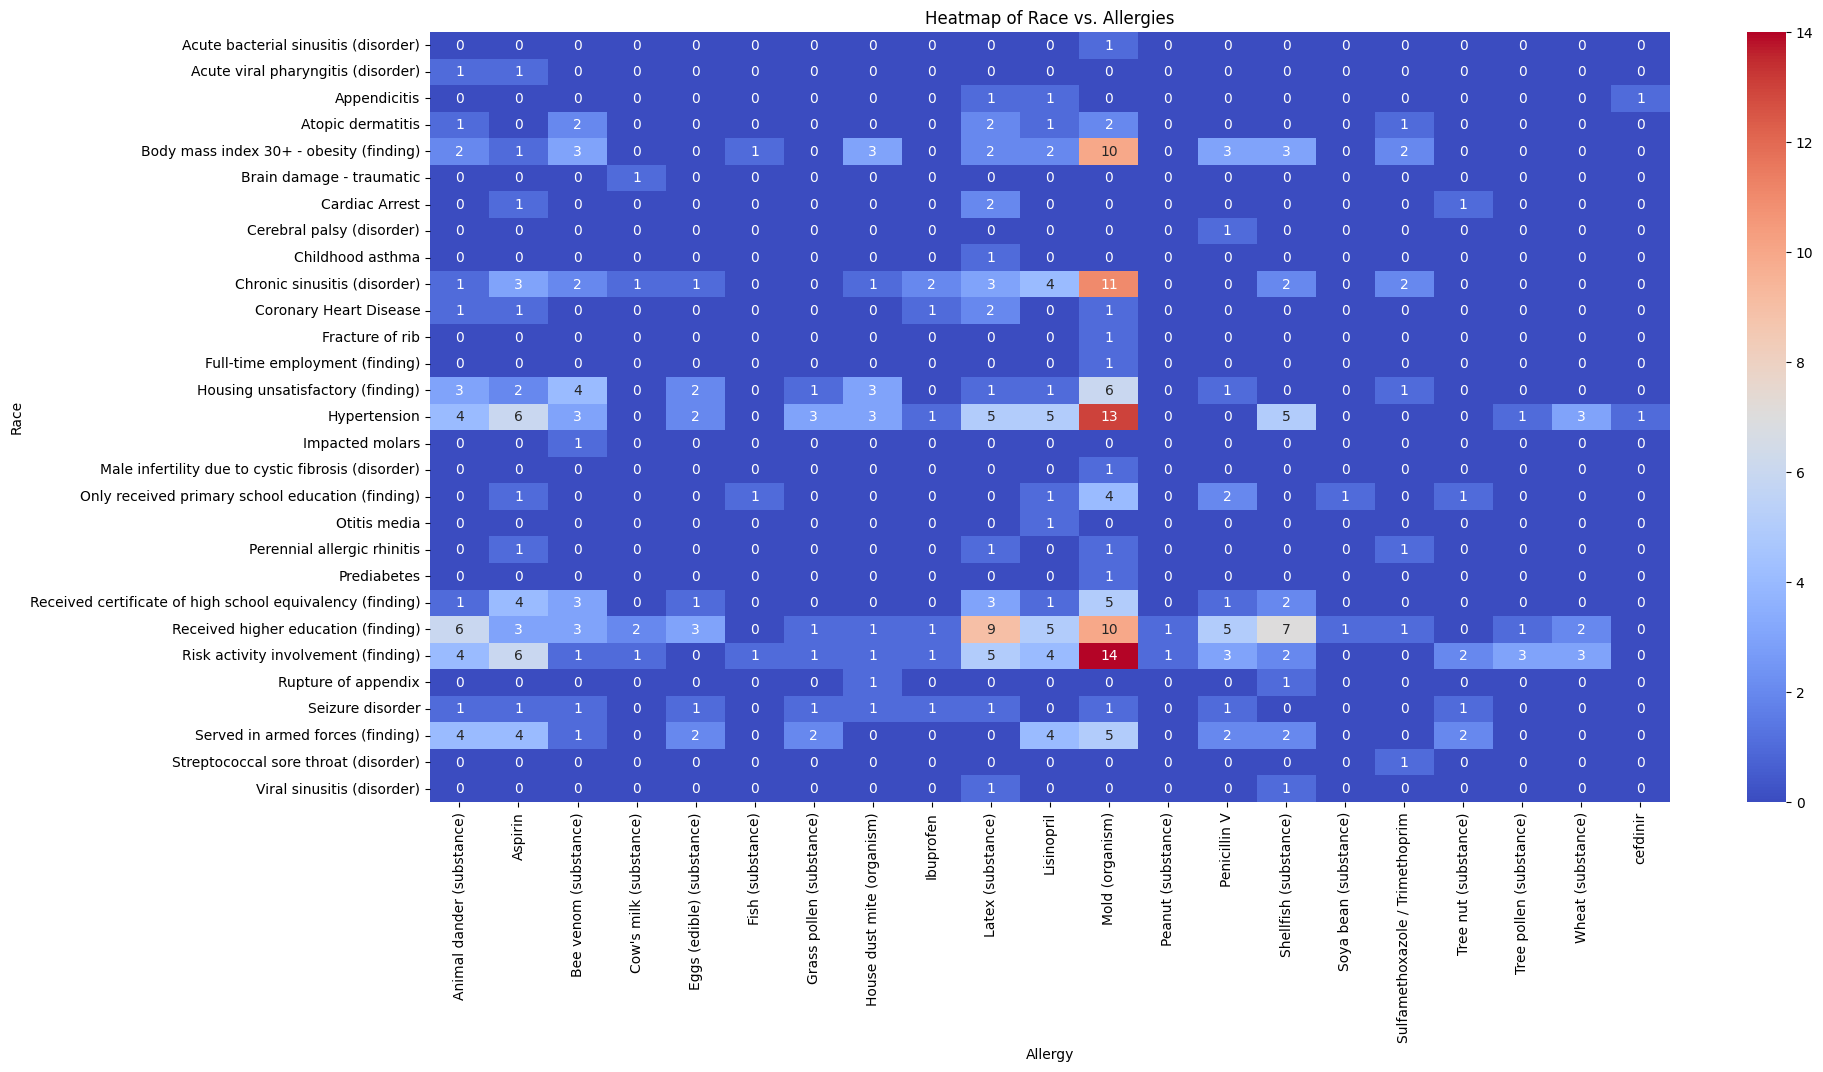

In [ ]:
import pandas as pd
import scipy.stats as stats


contingency_table = pd.crosstab(final_data['condition'], final_data['allergy'])

print("Contingency Table:")
print(contingency_table)

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"\nChi-square statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("\nExpected frequencies:")
print(expected)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
sns.heatmap(contingency_table, annot=True, fmt='g', cmap='coolwarm')
plt.title('Heatmap of Race vs. Allergies')
plt.xlabel('Allergy')
plt.ylabel('Race')
plt.show()

## Time between allergy and med diagnosis (NOTHING SIGNIFICANT FOUND)

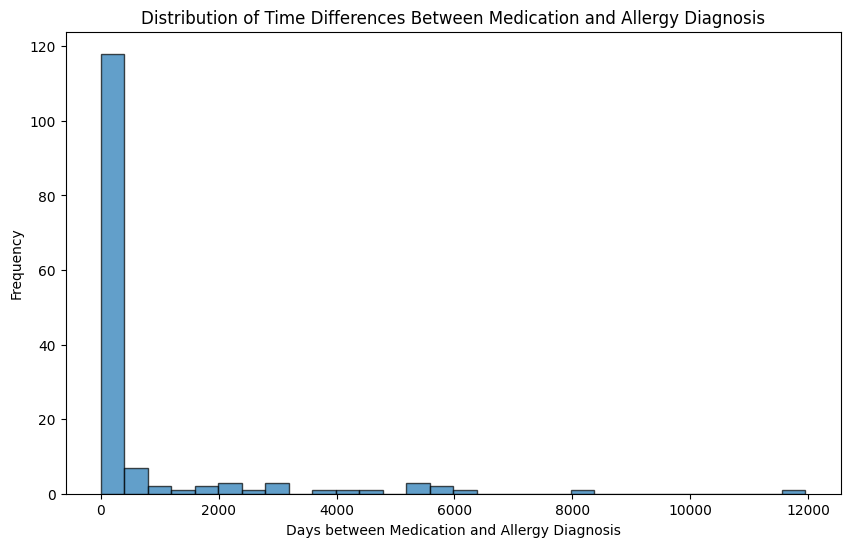

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


patients = pd.read_csv('patients.csv')
medications = pd.read_csv('medications.csv')
allergies = pd.read_csv('allergies.csv')

# removing duplicates
new_medications = medications.drop_duplicates(subset=['PATIENT'], keep='first')
new_allergies = allergies.drop_duplicates(subset=['PATIENT'], keep='first')

new_medications.to_csv('new_medications.csv', index=False)
new_allergies.to_csv('new_allergies.csv', index=False)


new_medications.loc[:, 'START'] = pd.to_datetime(new_medications['START']).dt.date
new_allergies.loc[:, 'START'] = pd.to_datetime(new_allergies['START']).dt.date

# # fixing column names
new_medications = new_medications.rename(columns={'START': 'medication_date'})
new_allergies = new_allergies.rename(columns={'START': 'allergy_date'})

# merge
data = patients.merge(new_medications[['PATIENT', 'medication_date']], left_on='Id', right_on='PATIENT', how='inner')
data = data.merge(new_allergies[['PATIENT', 'allergy_date']], on='PATIENT', how='inner')

final_data = data[['Id', 'medication_date', 'allergy_date']]
final_data.head()

data['medication_date'] = pd.to_datetime(data['medication_date'])
data['allergy_date'] = pd.to_datetime(data['allergy_date'])
data['time_diff'] = (data['allergy_date'] - data['medication_date']).dt.days

data = data[data['time_diff'] >= 0]

data.head()

plt.figure(figsize=(10, 6))
plt.hist(data['time_diff'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Time Differences Between Medication and Allergy Diagnosis')
plt.xlabel('Days between Medication and Allergy Diagnosis')
plt.ylabel('Frequency')
plt.show()




## Heat Map of Immunization vs Allergy

                                     Id                            condition  \
0  0a859c31-a1e5-03ee-7e60-c3661644185f         Chronic sinusitis (disorder)   
1  c719203f-0cb7-42e7-9cb2-c2ec32b99353         Chronic sinusitis (disorder)   
2  8860d8e2-6471-7e22-4b85-c4bd4e6599a8  Risk activity involvement (finding)   
3  ebfa5f8b-6aa8-6f80-1cad-1221a00b6933                         Hypertension   
4  b2049305-5896-e051-b8c3-16bcdca19289     Housing unsatisfactory (finding)   

                                          medication  \
0                 Naproxen sodium 220 MG Oral Tablet   
1     Chlorpheniramine Maleate 2 MG/ML Oral Solution   
2                       lisinopril 10 MG Oral Tablet   
3                       lisinopril 10 MG Oral Tablet   
4  60 ACTUAT Fluticasone propionate 0.25 MG/ACTUA...   

                                        immunization  \
0  Influenza  seasonal  injectable  preservative ...   
1  Influenza  seasonal  injectable  preservative ...   
2  Influenza  

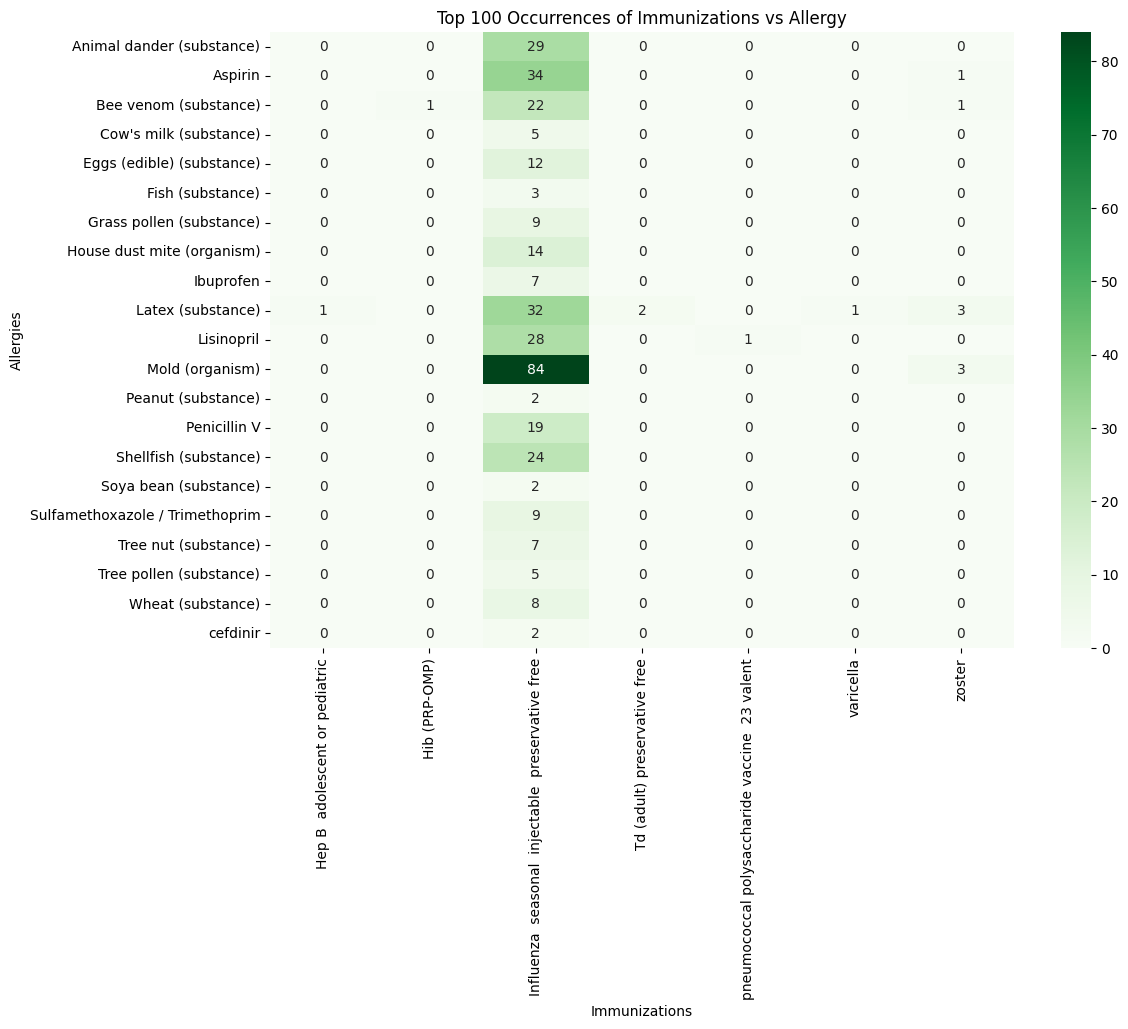

In [ ]:
import pandas as pd

# allergies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/healthcareManagementSystem/allergies.csv')
# conditions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/healthcareManagementSystem/conditions.csv')
# immunizations = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/healthcareManagementSystem/immunizations.csv')
# patients = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/healthcareManagementSystem/patients.csv')
# medications = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/healthcareManagementSystem/medications.csv')

allergies = pd.read_csv('allergies.csv')
conditions = pd.read_csv('conditions.csv')
immunizations = pd.read_csv('immunizations.csv')
patients = pd.read_csv('patients.csv')
medications = pd.read_csv('medications.csv')

# removing duplicates
new_allergies = allergies.drop_duplicates(subset=['PATIENT'], keep='first')
new_medications = medications.drop_duplicates(subset=['PATIENT'], keep='first')
new_conditions = conditions.drop_duplicates(subset=['PATIENT'], keep='first')
new_immunizations = immunizations.drop_duplicates(subset=['PATIENT'], keep='first')

new_allergies.to_csv('new_allergies.csv', index=False)
new_immunizations.to_csv('new_immunizations.csv', index=False)
new_conditions.to_csv('new_conditions.csv', index=False)
new_medications.to_csv('new_medications.csv', index=False)

# fixing column names
new_allergies = new_allergies.rename(columns={'DESCRIPTION': 'allergy'})
new_immunizations = new_immunizations.rename(columns={'DESCRIPTION': 'immunization'})
new_conditions = new_conditions.rename(columns={'DESCRIPTION': 'condition'})
new_medications = new_medications.rename(columns={'DESCRIPTION': 'medication'})

# merge
data = patients.merge(new_conditions[['PATIENT', 'condition']], left_on='Id', right_on='PATIENT', how='inner')
data = data.merge(new_medications[['PATIENT', 'medication']], on='PATIENT', how='inner')
data = data.merge(new_allergies[['PATIENT', 'allergy']], on='PATIENT', how='inner')
data = data.merge(new_immunizations[['PATIENT', 'immunization']], on='PATIENT', how='inner')
final_data = data[['Id', 'condition', 'medication', 'immunization', 'allergy']]

print(final_data.head())

# heat map of occurences
import seaborn as sns
import matplotlib.pyplot as plt

cross_tab = pd.crosstab(index=data['immunization'], columns=data['allergy'])

top_100 = cross_tab.unstack().sort_values(ascending=False)[:100]

top_100_immunizations = top_100.index.get_level_values('immunization').tolist()
top_100_allergies = top_100.index.get_level_values('allergy').tolist()

filtered_data = data[(data['immunization'].isin(top_100_immunizations)) & (data['allergy'].isin(top_100_allergies))]

filtered_cross_tab = pd.crosstab(index=filtered_data['allergy'], columns=filtered_data['immunization'])

plt.figure(figsize=(12, 8))
sns.heatmap(filtered_cross_tab, annot=True, cmap='Greens', fmt='g')
plt.title('Top 100 Occurrences of Immunizations vs Allergy')
plt.xlabel('Immunizations')
plt.ylabel('Allergies')
plt.show()


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



Chi-square statistic: 1184.7038518054424
p-value: 6.776951083146629e-06
Degrees of freedom: 980

Expected frequencies:
[[0.31016043 0.37433155 0.25668449 ... 0.05347594 0.0855615  0.02139037]
 [1.55080214 1.87165775 1.28342246 ... 0.26737968 0.42780749 0.10695187]
 [0.46524064 0.56149733 0.38502674 ... 0.0802139  0.12834225 0.03208556]
 ...
 [1.62834225 1.96524064 1.34759358 ... 0.28074866 0.44919786 0.11229947]
 [0.31016043 0.37433155 0.25668449 ... 0.05347594 0.0855615  0.02139037]
 [0.31016043 0.37433155 0.25668449 ... 0.05347594 0.0855615  0.02139037]]


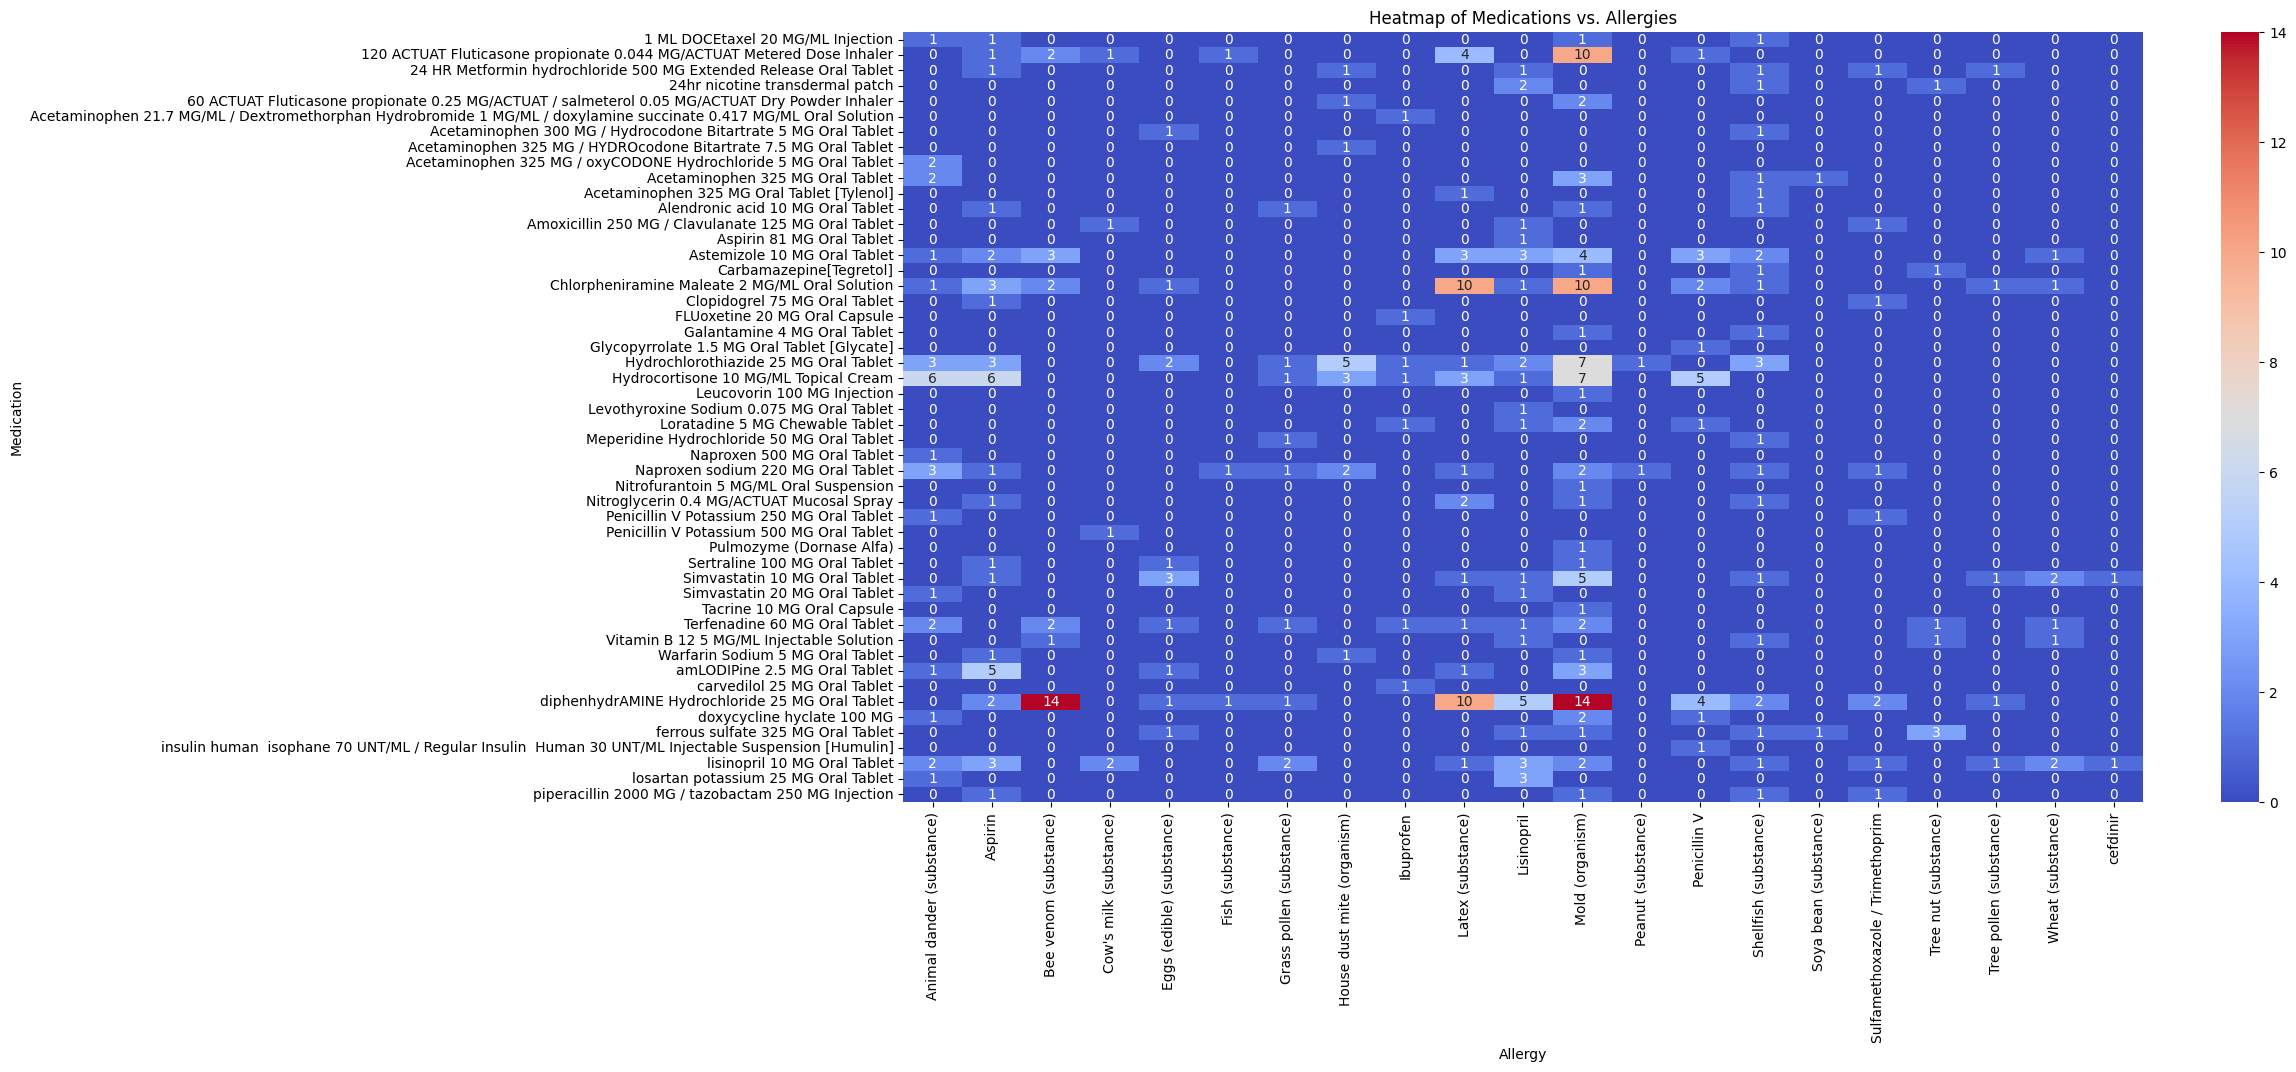

In [ ]:
import scipy.stats as stats

contingency_table = pd.crosstab(medAllergy_df['medication'], medAllergy_df['allergy'])

# print("Contingency Table:")
# print(contingency_table)
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Display the results
print(f"\nChi-square statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("\nExpected frequencies:")
print(expected)

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the contingency table
plt.figure(figsize=(20, 10))
sns.heatmap(contingency_table, annot=True, fmt='g', cmap='coolwarm')
plt.title('Heatmap of Medications vs. Allergies')
plt.xlabel('Allergy')
plt.ylabel('Medication')
plt.show()


# ML Models

## Logistic Regression of Conditions

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

## Logistic Regression of Medication & allergy

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE


medAllergy_df.loc[:, 'target'] = medAllergy_df['allergy'].apply(lambda x: 1 if x == 'Mold (organism)' else 0)

print(medAllergy_df['target'].value_counts())

X = medAllergy_df[['medication']]
y = medAllergy_df['target']

encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)
X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out(['medication']))

X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=1)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


target
0    286
1     88
Name: count, dtype: int64
Accuracy: 0.6533333333333333
Precision: 0.25
Recall: 0.2222222222222222
Confusion Matrix:
[[45 12]
 [14  4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.78        57
           1       0.25      0.22      0.24        18

    accuracy                           0.65        75
   macro avg       0.51      0.51      0.51        75
weighted avg       0.64      0.65      0.65        75



## Linear Regression Models

Mean Absolute Error (MAE): 215311115833.23492
Mean Squared Error (MSE): 2.189413157135868e+24
R-squared: -1.2374274443668981e+26


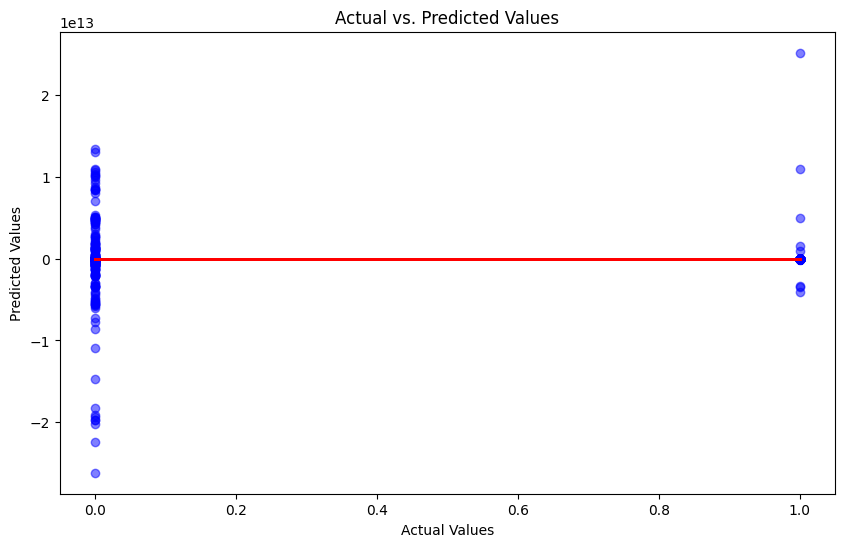

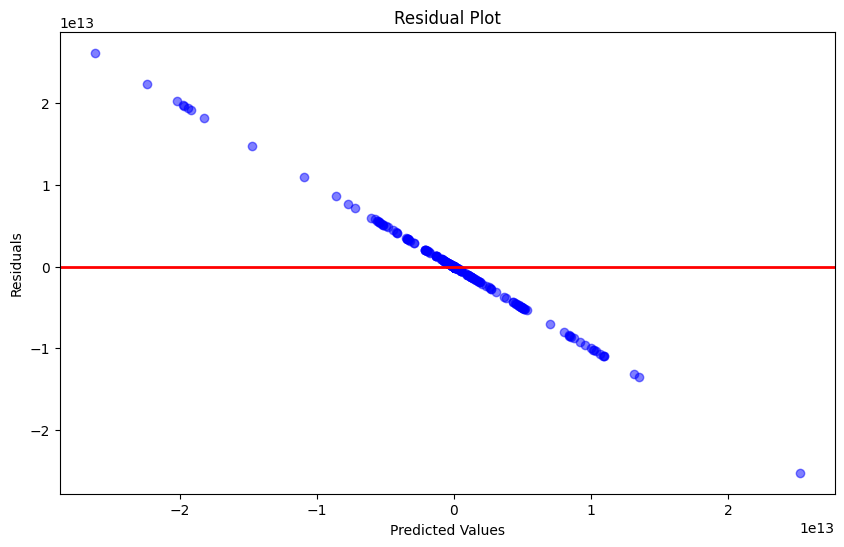

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

# allergies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/healthcareManagementSystem/allergies.csv')
# conditions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/healthcareManagementSystem/conditions.csv')
# immunizations = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/healthcareManagementSystem/immunizations.csv')
# patients = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/healthcareManagementSystem/patients.csv')
# medications = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/healthcareManagementSystem/medications.csv')

allergies = pd.read_csv('allergies.csv')
conditions = pd.read_csv('conditions.csv')
immunizations = pd.read_csv('immunizations.csv')
patients = pd.read_csv('patients.csv')
medications = pd.read_csv('medications.csv')

# removing duplicates
new_allergies = allergies.drop_duplicates(subset=['PATIENT'], keep='first')
new_medications = medications.drop_duplicates(subset=['PATIENT'], keep='first')
new_conditions = conditions.drop_duplicates(subset=['PATIENT'], keep='first')
new_immunizations = immunizations.drop_duplicates(subset=['PATIENT'], keep='first')

new_allergies.to_csv('new_allergies.csv', index=False)
new_immunizations.to_csv('new_immunizations.csv', index=False)
new_conditions.to_csv('new_conditions.csv', index=False)
new_medications.to_csv('new_medications.csv', index=False)

# fixing column names
new_allergies = new_allergies.rename(columns={'DESCRIPTION': 'allergy'})
new_immunizations = new_immunizations.rename(columns={'DESCRIPTION': 'immunization'})
new_conditions = new_conditions.rename(columns={'DESCRIPTION': 'condition'})
new_medications = new_medications.rename(columns={'DESCRIPTION': 'medication'})

# merge
data = patients.merge(new_conditions[['PATIENT', 'condition']], left_on='Id', right_on='PATIENT', how='inner')
data = data.merge(new_medications[['PATIENT', 'medication']], on='PATIENT', how='inner')
data = data.merge(new_allergies[['PATIENT', 'allergy']], on='PATIENT', how='inner')
data = data.merge(new_immunizations[['PATIENT', 'immunization']], on='PATIENT', how='inner')
final_data = data[['Id', 'condition', 'medication', 'immunization', 'allergy']]

dependentVar = ['condition', 'immunization', 'medication']
target = 'allergy'

X = final_data[dependentVar]
y = final_data[target]

X = pd.get_dummies(X)
y = pd.get_dummies(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

# scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

# Residual plot
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


## Random Forest Classifier Model (using allergy code)


                                       Id  conditionCode  medicationCode  \
0    0a859c31-a1e5-03ee-7e60-c3661644185f     40055000.0          849574   
1    c719203f-0cb7-42e7-9cb2-c2ec32b99353     40055000.0          477045   
2    8860d8e2-6471-7e22-4b85-c4bd4e6599a8    160968000.0          314076   
3    ebfa5f8b-6aa8-6f80-1cad-1221a00b6933     59621000.0          314076   
4    b2049305-5896-e051-b8c3-16bcdca19289    105531004.0          896209   
..                                    ...            ...             ...   
319  ab6aecce-52d2-40e4-8eb8-14abdcff1f7b    128613002.0         1049630   
320  7480ccf3-fb1a-c66c-5a54-6a7897985607    128613002.0          310798   
321  ff28a361-684c-814f-c42e-a5702f7ebc69    162864005.0          106258   
322  487abf27-2e5d-2ad2-f562-8f84f9fbb3e1    224355006.0          861467   
323  963f9e13-546a-120a-c1b1-8064757f877b    224355006.0          198031   

     immunizationCode      allergyCode  
0                 140         84489001  
1    

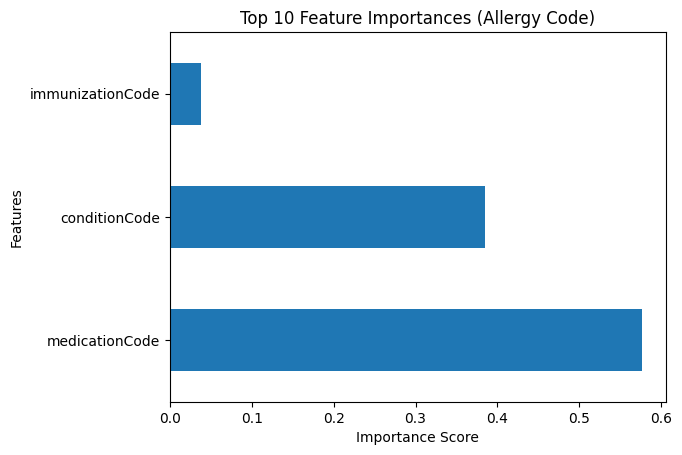

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# allergies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/healthcareManagementSystem/allergies.csv')
# conditions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/healthcareManagementSystem/conditions.csv')
# immunizations = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/healthcareManagementSystem/immunizations.csv')
# patients = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/healthcareManagementSystem/patients.csv')
# medications = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/healthcareManagementSystem/medications.csv')

allergies = pd.read_csv('allergies.csv')
conditions = pd.read_csv('conditions.csv')
immunizations = pd.read_csv('immunizations.csv')
patients = pd.read_csv('patients.csv')
medications = pd.read_csv('medications.csv')

# removing duplicates
new_allergies = allergies.drop_duplicates(subset=['PATIENT'], keep='first')
new_medications = medications.drop_duplicates(subset=['PATIENT'], keep='first')
new_conditions = conditions.drop_duplicates(subset=['PATIENT'], keep='first')
new_immunizations = immunizations.drop_duplicates(subset=['PATIENT'], keep='first')

new_allergies.to_csv('new_allergies.csv', index=False)
new_immunizations.to_csv('new_immunizations.csv', index=False)
new_conditions.to_csv('new_conditions.csv', index=False)
new_medications.to_csv('new_medications.csv', index=False)

# fixing column names
new_allergies = new_allergies.rename(columns={'CODE': 'allergyCode'})
new_immunizations = new_immunizations.rename(columns={'CODE': 'immunizationCode'})
new_conditions = new_conditions.rename(columns={'CODE': 'conditionCode'})
new_medications = new_medications.rename(columns={'CODE': 'medicationCode'})

# merge
data = patients.merge(new_conditions[['PATIENT', 'conditionCode']], left_on='Id', right_on='PATIENT', how='inner')
data = data.merge(new_medications[['PATIENT', 'medicationCode']], on='PATIENT', how='inner')
data = data.merge(new_allergies[['PATIENT', 'allergyCode']], on='PATIENT', how='inner')
data = data.merge(new_immunizations[['PATIENT', 'immunizationCode']], on='PATIENT', how='inner')
final_data = data[['Id', 'conditionCode', 'medicationCode', 'immunizationCode', 'allergyCode']].copy()

print(final_data)

le = LabelEncoder()
final_data['allergy_encoded'] = le.fit_transform(final_data['allergyCode'])

X = final_data[['conditionCode', 'medicationCode', 'immunizationCode']]
y = final_data['allergy_encoded']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred, average='weighted', zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted', zero_division=0))

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances (Allergy Code)')
plt.show()

## Random Forest Classifier Model (using categorical values)

Accuracy: 0.19
Precision: 0.12624333561175669
Recall: 0.19
F1 Score: 0.13178484848484848


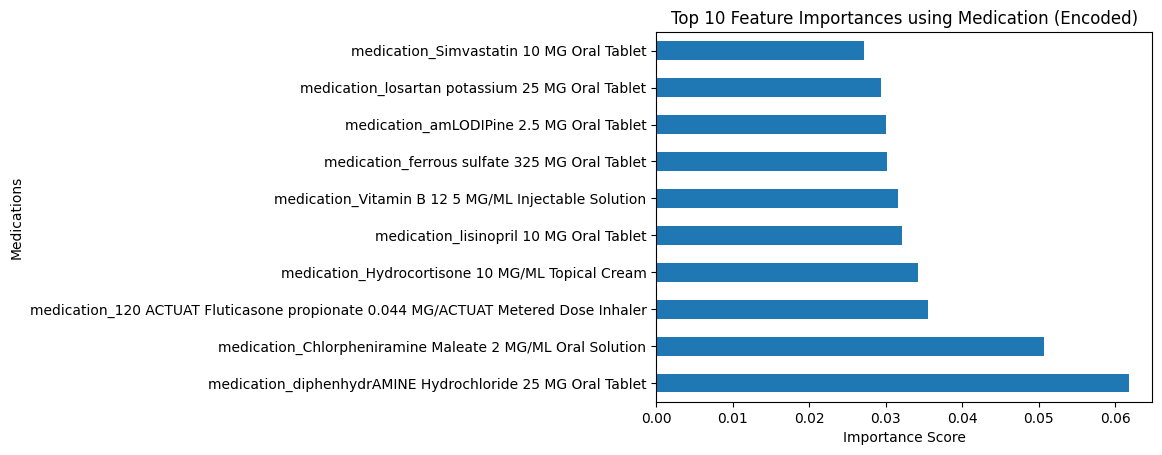

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# allergies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/healthcareManagementSystem/allergies.csv')
# conditions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/healthcareManagementSystem/conditions.csv')
# immunizations = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/healthcareManagementSystem/immunizations.csv')
# patients = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/healthcareManagementSystem/patients.csv')
# medications = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/healthcareManagementSystem/medications.csv')

allergies = pd.read_csv('allergies.csv')
conditions = pd.read_csv('conditions.csv')
immunizations = pd.read_csv('immunizations.csv')
patients = pd.read_csv('patients.csv')
medications = pd.read_csv('medications.csv')

# removing duplicates
new_allergies = allergies.drop_duplicates(subset=['PATIENT'], keep='first')
new_medications = medications.drop_duplicates(subset=['PATIENT'], keep='first')
new_conditions = conditions.drop_duplicates(subset=['PATIENT'], keep='first')
new_immunizations = immunizations.drop_duplicates(subset=['PATIENT'], keep='first')

new_allergies.to_csv('new_allergies.csv', index=False)
new_immunizations.to_csv('new_immunizations.csv', index=False)
new_conditions.to_csv('new_conditions.csv', index=False)
new_medications.to_csv('new_medications.csv', index=False)

# fixing column names
new_allergies = new_allergies.rename(columns={'DESCRIPTION': 'allergy'})
new_immunizations = new_immunizations.rename(columns={'DESCRIPTION': 'immunization'})
new_conditions = new_conditions.rename(columns={'DESCRIPTION': 'condition'})
new_medications = new_medications.rename(columns={'DESCRIPTION': 'medication'})

# merge
data = patients.merge(new_conditions[['PATIENT', 'condition']], left_on='Id', right_on='PATIENT', how='inner')
data = data.merge(new_medications[['PATIENT', 'medication']], on='PATIENT', how='inner')
data = data.merge(new_allergies[['PATIENT', 'allergy']], on='PATIENT', how='inner')
data = data.merge(new_immunizations[['PATIENT', 'immunization']], on='PATIENT', how='inner')
final_data = data[['Id', 'condition', 'medication', 'immunization', 'allergy']].copy()

le = LabelEncoder()
final_data.loc[:, 'allergy_encoded'] = le.fit_transform(final_data['allergy'])

X = final_data[['medication']]
y = final_data['allergy_encoded']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred, average='weighted', zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted', zero_division=0))

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')


plt.xlabel('Importance Score')
plt.ylabel('Medications')
plt.title('Top 10 Feature Importances using Medication (Encoded)')

plt.show()

Accuracy: 0.19
Precision: 0.06257142857142856
Recall: 0.19
F1 Score: 0.08019607843137255


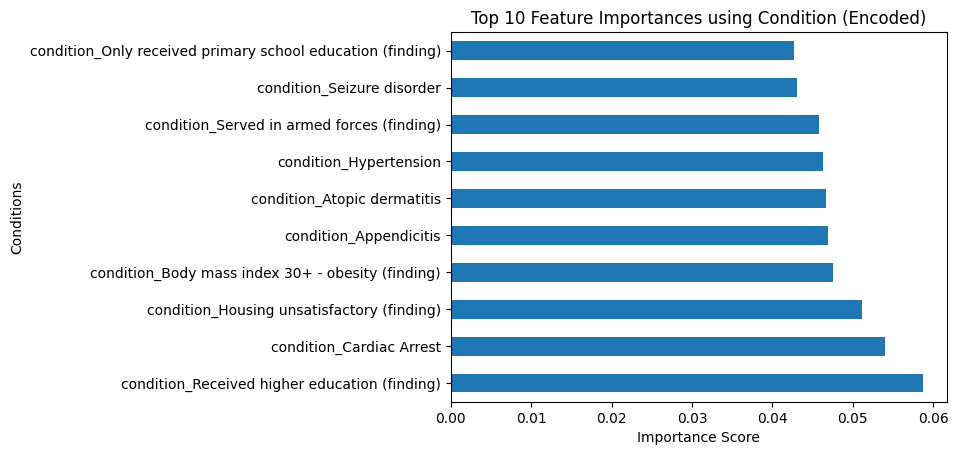

In [16]:
le = LabelEncoder()
final_data['allergy_encoded'] = le.fit_transform(final_data['allergy'])

X = final_data[['condition']]
y = final_data['allergy_encoded']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division = 0))
print("Recall:", recall_score(y_test, y_pred, average='weighted', zero_division = 0))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted', zero_division = 0))

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')

plt.xlabel('Importance Score')
plt.ylabel('Conditions')
plt.title('Top 10 Feature Importances using Condition (Encoded)')
plt.show()

Accuracy: 0.2
Precision: 0.106875
Recall: 0.2
F1 Score: 0.09654135338345864


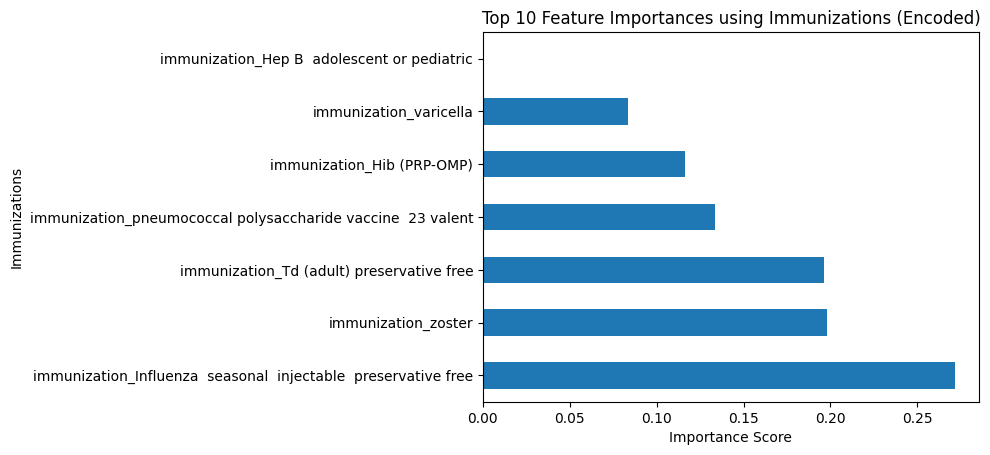

In [17]:
le = LabelEncoder()
final_data['allergy_encoded'] = le.fit_transform(final_data['allergy'])

X = final_data[['immunization']]
y = final_data['allergy_encoded']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division = 0))
print("Recall:", recall_score(y_test, y_pred, average='weighted', zero_division = 0))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted', zero_division = 0))

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Importance Score')
plt.ylabel('Immunizations')
plt.title('Top 10 Feature Importances using Immunizations (Encoded)')

plt.show()